In [11]:
import os
print(os.getcwd())

[autoreload of config failed: Traceback (most recent call last):
  File "C:\Users\nette\anaconda3\envs\ada\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
    
  File "C:\Users\nette\anaconda3\envs\ada\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
    
  File "C:\Users\nette\anaconda3\envs\ada\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
    
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\nette\Dateistruktur\RWTH\Auslandssemester\ImSemester\CS-401 Applied Data Analysis\Project\P3\the-five-data-wranglers\config.py", line 4, in <module>
    df_ba_ratings, df_rb_ratings = load_rating_data()
    
  File "C:\Users\nette\Dateistruktur\RWTH\Auslandss

C:\Users\nette\Dateistruktur\RWTH\Auslandssemester\ImSemester\CS-401 Applied Data Analysis\Project\P3\the-five-data-wranglers


In [6]:
%load_ext autoreload
%autoreload 2
from config import df_ba_ratings, df_rb_ratings
from src.models.seasonality_analysis import *
from src.models.foreign_beer import *
from src.models.experience_words import *
from src.data.some_dataloader import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
plot_beer_style_ranking_by_amount(df_rb_ratings, df_rb_ratings['style'].unique(),  300, 14)

We lost 0 rows by filtering out styles with less than 14 reviews.


# Generaing the plots for the experience_words analysis

### Combined plot with distribution and rating differences

In [2]:
exp_user_ids_ba = get_experienced_users2(df_ba_ratings, exp_words1)
df_ba_ratings_of_exp, df_ba_ratings_of_inexp = split_by_experience(df_ba_ratings, exp_user_ids_ba)

In [3]:
# printing some interesting statistics
print("Number of experienced users: ", len(exp_user_ids_ba))
print("Number of ratings by experienced users: ", len(df_ba_ratings_of_exp))
print("Average rating by experienced users: ", round(df_ba_ratings_of_exp["rating"].mean(), 2))
print("\nNumber of inexperienced users: ", len(df_rb_ratings["user_id"].unique()) - len(exp_user_ids_ba))
print("Number of ratings by inexperienced users: ", len(df_ba_ratings_of_inexp))
print("Average rating by inexperienced users: ", round(df_ba_ratings_of_inexp["rating"].mean(), 2))

Number of experienced users:  3959
Number of ratings by experienced users:  2555996
Average rating by experienced users:  3.82

Number of inexperienced users:  58293
Number of ratings by inexperienced users:  5837036
Average rating by inexperienced users:  3.91


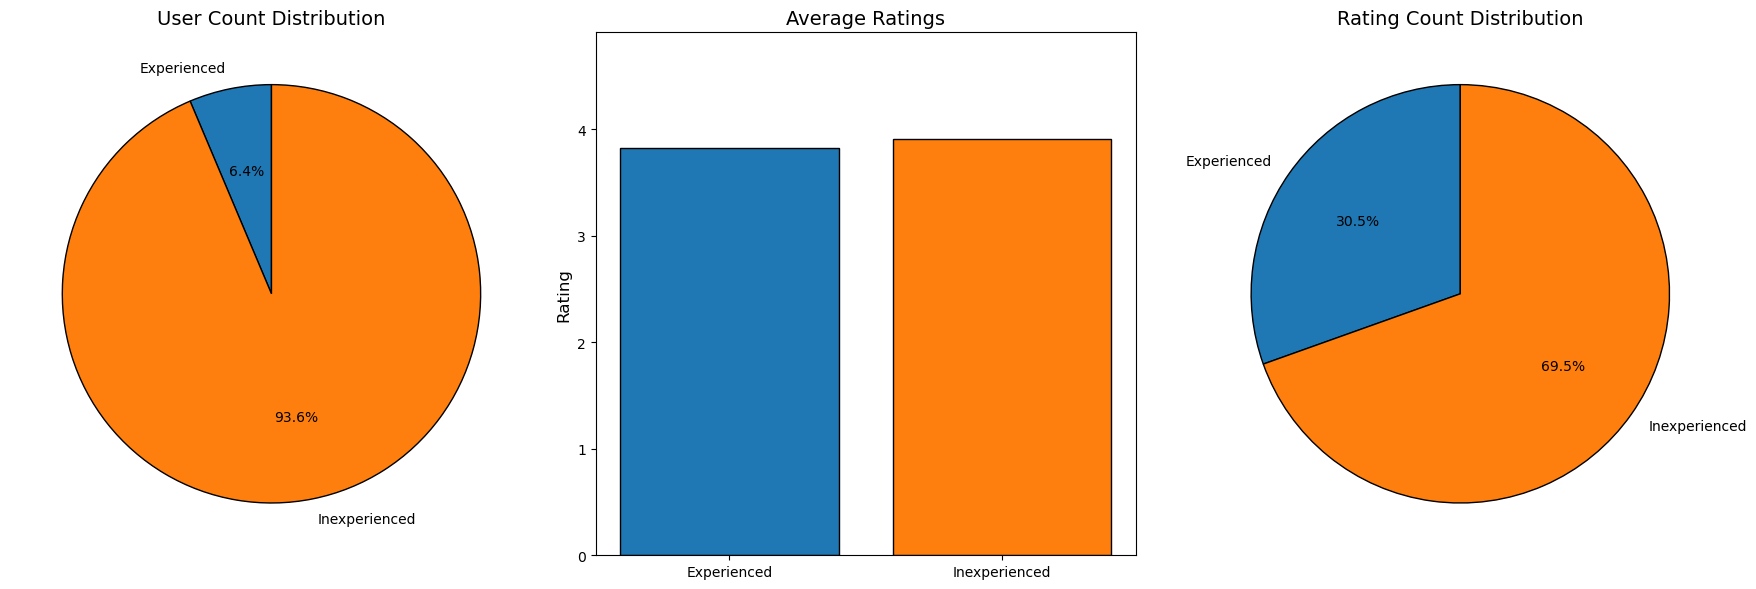

In [4]:
# creating a plot for these statistics so that they can be presented nicely on the website


Plot saved as plot.html


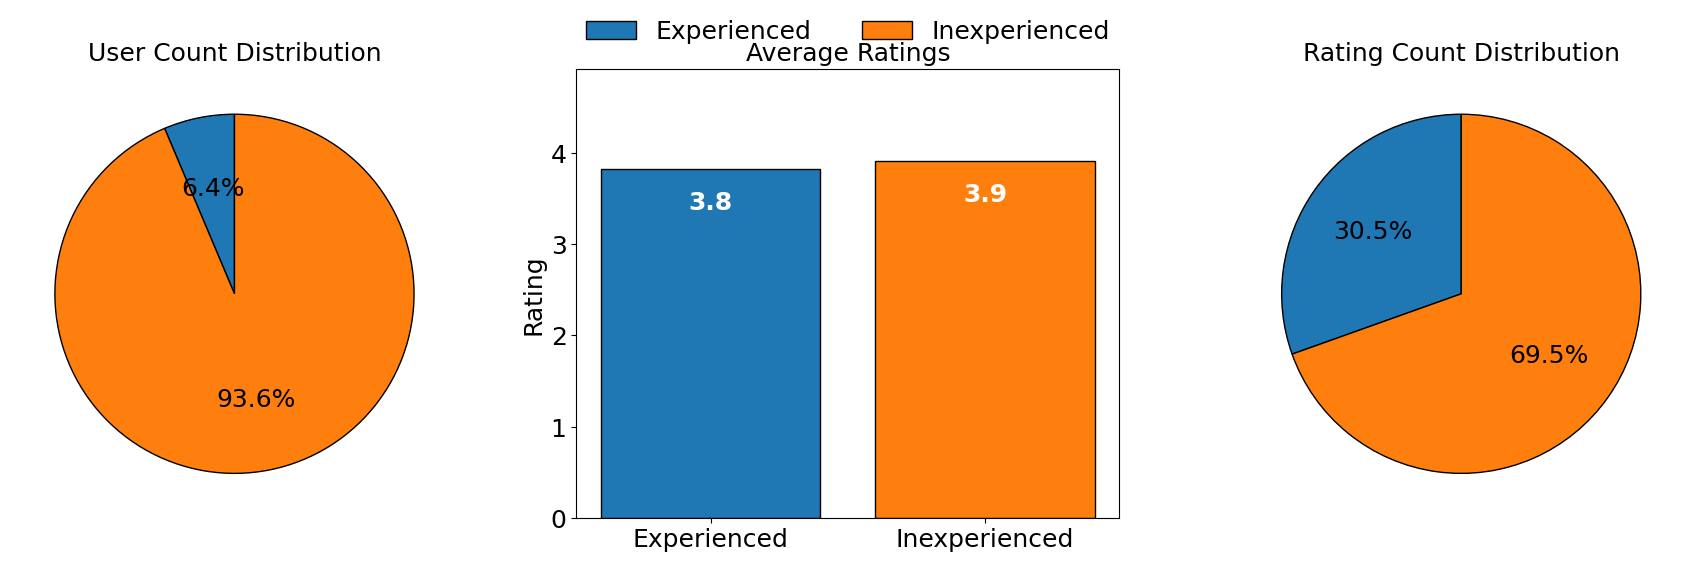

In [13]:
plot_user_data(len(exp_user_ids_ba), len(df_rb_ratings["user_id"].unique()) - len(exp_user_ids_ba), len(df_ba_ratings_of_exp), len(df_ba_ratings_of_inexp), round(df_ba_ratings_of_exp["rating"].mean(), 2), round(df_ba_ratings_of_inexp["rating"].mean(), 2), mode="save")

In [6]:
plot_df, most_rated = calculate_style_distribution(df_ba_ratings_of_exp, df_ba_ratings_of_inexp)

In [7]:
rating_diff_df = calculate_rating_difference(df_ba_ratings_of_exp, df_ba_ratings_of_inexp, most_rated)

In [8]:
rating_diff_df2, distr_diff_df = calculate_rating_difference_with_ci(df_ba_ratings_of_exp, df_ba_ratings_of_inexp, most_rated)

In [10]:
save_plot_combined_distribution_and_rating_difference_with_ci(plot_df, rating_diff_df2, distr_diff_df)

### US map plot

In [2]:
df_ba_users, df_rb_users = load_user_data()

In [3]:
df_brew = load_brewery_data(brewery_path="src/data/RateBeer/breweries.csv")

In [4]:
df_ba_ratings_wo_text = load_rating_wo_text("src/data/BeerAdvocate/BA_ratings.csv")

df_ba_ratings_w_text = df_ba_ratings
df_rb_ratings_w_text = df_rb_ratings

In [5]:
df_rb_users_ratings_us_only, df_ba_users_ratings_us_only = prepare_datasets(df_rb_users, df_ba_users, df_rb_ratings_w_text, df_ba_ratings_w_text)

Number of ratings from US from BeerAdvocate: 7303870
Number of ratings from US from RateBeer: 352157


In [6]:
# there are some duplicates in the two datasets
df_rb_users_ratings_us_only = filter_usa_duplicates(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, ["style", "brewery_name", "abv", "text"])

Number of duplicates:  317982


In [7]:
df_rb_users_ratings_us_only = df_rb_users_ratings_us_only.drop(columns=["text"])
df_ba_users_ratings_us_only = df_ba_users_ratings_us_only.drop(columns=["text"])

In [8]:
df_ba_brew = load_brewery_data(brewery_path="src/data/BeerAdvocate/breweries.csv")

In [9]:
df_us_only = merge_with_brewery(df_rb_users_ratings_us_only, df_ba_users_ratings_us_only, df_brew, df_ba_brew)

Number of ratings from US: 7332710


In [10]:
df_us_only = avg_ratings_us(df_us_only)

Avg rating for US beer: 3.9113082983029344
Avg rating for non-US beer: 3.800977039382433


In [11]:
avg_ratings_per_location = avg_ratings_per_location_us(df_us_only)

In [12]:
plot_avg_ratings_map(avg_ratings_per_location)

is_us_beer user_location     False      True  Difference
0                Alabama  3.749917  3.840242    0.090325
1                 Alaska  3.906063  3.948660    0.042597
2                Arizona  3.777696  3.927382    0.149686
3               Arkansas  3.783181  3.864941    0.081760
4             California  3.805595  3.959702    0.154107
is_us_beer State     False      True  Rating Difference
0             AL  3.749917  3.840242           0.090325
1             AK  3.906063  3.948660           0.042597
2             AZ  3.777696  3.927382           0.149686
3             AR  3.783181  3.864941           0.081760
4             CA  3.805595  3.959702           0.154107


### World map plot

In [2]:
df_ba_users, df_rb_users = load_user_data()
df_rb_sum_rat = calculate_ratings_by_location(df_rb_users)
df_rb_sum_rat_foreign = accumulate_us(df_rb_sum_rat)
df_rb_sum_rat_cutoff = cutoff_and_sort(df_rb_sum_rat_foreign)

In [3]:
df_rb_ratings_wo_text = load_rating_wo_text("src/data/RateBeer/RB_ratings.csv")

df_rb_users_us = accumulate_us2(df_rb_users, "location")
df_rb_users_ratings = merge_users_and_ratings(df_rb_ratings_wo_text, df_rb_users_us)
df_rb_users_ratings_top50, top50 = filter_top_countries(df_rb_users_ratings, top_n=50)

df_plot = avg_rating_by_location(df_rb_users_ratings_top50)

In [7]:
plot_mean_rating_by_location(df_plot)

Plot saved as: src/plots/world_avg_map2.html


In [13]:
plot_bar_chart(df_plot)

In [11]:
plot_choropleth_map(df_plot)